#Analisis de COVID19 en México

Vamos a hacer un analisis de los datos de COVID19 en la Ciudad de México para ver cual ha sido el incremento en el número de casos por dia

El objetivo es ver si las medidas de contención estan funcionando, pues los porcentajes sobre numeros cada vez mayoers no son indicadores claros del crecimiento de la enfermedad.

In [2]:
from selenium import webdriver
from bs4 import BeautifulSoup as bs
import pandas as pd
import matplotlib.pyplot as plt
import datetime
#importamos el driver para google chrome 83.04.***
driver = webdriver.Chrome("/home/kritt/vpython3.8/chromedriver")
#URL de donde vamos a bajar las cosas
driver.get("https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Mexico")
#Luego creamos un par de listas vacias para guardar los datos
enfermos = []
muertos = []
#obtenemos el contenido
contenido = driver.page_source #esta es la pagina
# y lo pasamos al BeautifulSoup
soup = bs(contenido, 'html.parser') #esta es toda la sopa en html
datos=soup.find_all('span', class_='cbs-ibr') #inspecionamos (inspect from chrome) para saber el elemento que queremos
fechas=soup.find_all('td', class_='bb-04em')
print(f"Numero de datos recuperados {len(datos)}, enfermos + muertos") #numero de datos en la lista, enfermos y muertos
#como la informacion viene revuelta, los pares son enfermos y los nones son muertos

for i in range(0,len(datos)):
    if i%2==0:
        #Tenemos datos en forma de string, por lo que tenemos que extraer el texto del tag de html (get_text()), 
        #luego eliminar las comas (string.replace(',','')) y finalemnte convetir el resultado a un numero
        #float(string)
        enfermos.append(float(datos[i].get_text().replace(',','')))
    else:
        aux=datos[i].get_text().replace(',','')
        if aux.isnumeric():
            muertos.append(float(aux))
        else:
            muertos.append(0)

#print(fechas[0])
#print(fechas[3])
#print(fechas[6])
#print(fechas[9])
#print(fechas[12].get_text())
#Tenemos las fechas cada multiplo de tres. Y los primeros dias faltan algunos datos, empiezan a ser estables
#a partir de el 2020-03-11
#vamos a usar un contador y un while

#Lista de Fechas
dates=[]
i=0 #Contador Generico
while i < len(fechas):
    dates.append(fechas[i].get_text())
    i=i+3

       


    

Numero de datos recuperados 274, enfermos + muertos


In [3]:
#Verificamos que tengamos los datos
print("Resultado de recuperacion de datos, los tres deben ser iguales:\n")
print(f"Número de datos de fecha: {len(dates)}")
print(f"Número de datos de enfermos: {len(enfermos)}")
print(f"Número de datos de muertos: {len(muertos)}")

#print(enfermos)
#print(muertos)
#print(dates)

Resultado de recuperacion de datos, los tres deben ser iguales:

Número de datos de fecha: 137
Número de datos de enfermos: 137
Número de datos de muertos: 137


#Gráfica Enfermos

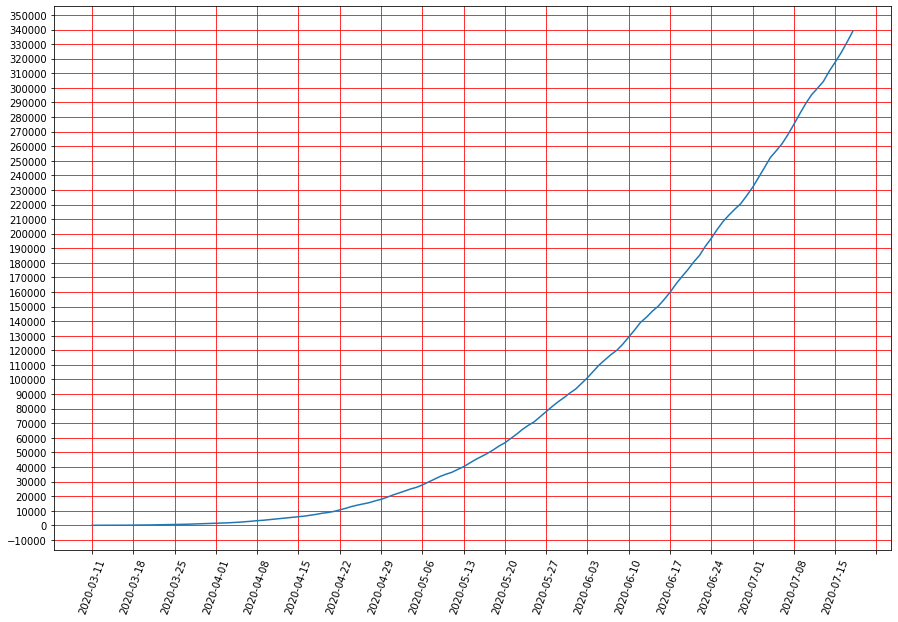

In [4]:
#Como tenemos algunas fechas faltantes, vamos a cortas los primeros 7 datos, donde han inconsistencias
#plt.pĺot(x,y) donde x es una lista de fechas y 'y' es una lista datos

#Graficamos la curva general de enfemos cortando los primeros siete datos
##Primero los datos son texto, debemos convertirlos a fechas y numeros
#empecemos con los enfermos y recortamos los primeros 7 datos

plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(7))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(10000))
plt.xticks(rotation=70)
plt.grid(b=True, color='r')

#plt.rcParams['figure.figsize'] = [20, 20] #inches
plt.plot(dates[7:],enfermos[7:])
#plt.plot(dates[7:],enfermos[7:])
#plt.plot(dates[7:],enfermos[7:])

In [5]:
# Aqui impimimos el total de enfermos 
d_enfermos={}
print(f"Total de datos: {len(dates[7:])}: \n") #Cortamos los primeros 7 por inconsistencias
for i in range(7,len(dates)):
    d_enfermos[dates[i]]=enfermos[i]
    #print(f"{dates[i]} : {enfermos[i]}")

print(d_enfermos)



Total de datos: 130: 

{'2020-03-11': 11.0, '2020-03-12': 15.0, '2020-03-13': 26.0, '2020-03-14': 41.0, '2020-03-15': 53.0, '2020-03-16': 78.0, '2020-03-17': 89.0, '2020-03-18': 118.0, '2020-03-19': 164.0, '2020-03-20': 203.0, '2020-03-21': 251.0, '2020-03-22': 316.0, '2020-03-23': 367.0, '2020-03-24': 405.0, '2020-03-25': 475.0, '2020-03-26': 585.0, '2020-03-27': 717.0, '2020-03-28': 848.0, '2020-03-29': 993.0, '2020-03-30': 1094.0, '2020-03-31': 1215.0, '2020-04-01': 1378.0, '2020-04-02': 1510.0, '2020-04-03': 1688.0, '2020-04-04': 1890.0, '2020-04-05': 2143.0, '2020-04-06': 2439.0, '2020-04-07': 2785.0, '2020-04-08': 3181.0, '2020-04-09': 3441.0, '2020-04-10': 3844.0, '2020-04-11': 4219.0, '2020-04-12': 4661.0, '2020-04-13': 5014.0, '2020-04-14': 5399.0, '2020-04-15': 5847.0, '2020-04-16': 6297.0, '2020-04-17': 6875.0, '2020-04-18': 7497.0, '2020-04-19': 8261.0, '2020-04-20': 8772.0, '2020-04-21': 9501.0, '2020-04-22': 10544.0, '2020-04-23': 11633.0, '2020-04-24': 12872.0, '2020-04-

#Grafica Muertos

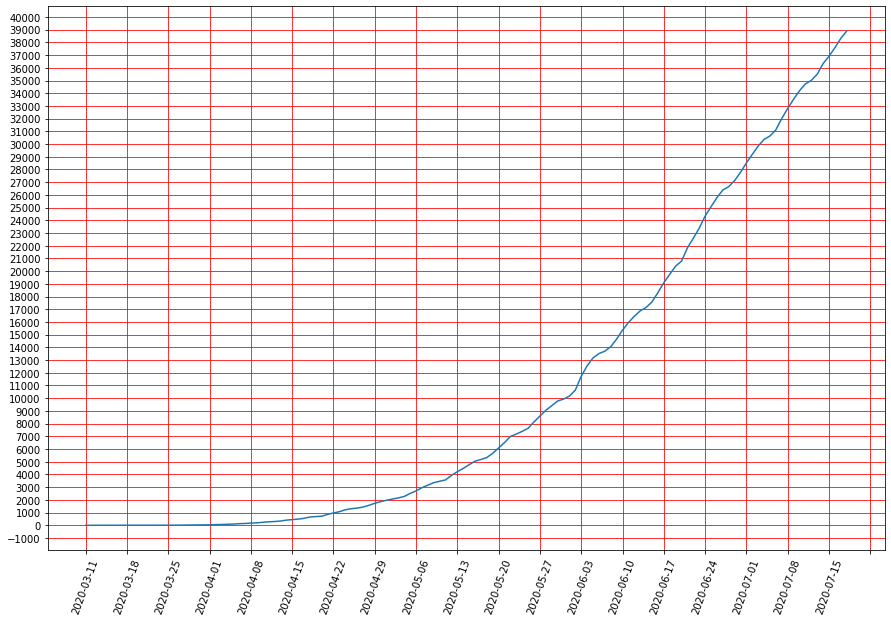

In [6]:
plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(7))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(1000))
plt.xticks(rotation=70)
plt.grid(b=True, color='r')

plt.plot(dates[7:],muertos[7:])

In [7]:
#Ahora impimimos El numero de muertos totales
d_muertos={}
print(f"Total de datos: {len(dates[7:])}: \n") #Cortamos los primero 7 por incosistencias
for i in range(7,len(dates)):
    d_muertos[dates[i]]=muertos[i]
    #print(f"{dates[i]} : {muertos[i]}")
print(d_muertos)



Total de datos: 130: 

{'2020-03-11': 0, '2020-03-12': 0, '2020-03-13': 0, '2020-03-14': 0, '2020-03-15': 0, '2020-03-16': 0, '2020-03-17': 0, '2020-03-18': 1.0, '2020-03-19': 1.0, '2020-03-20': 2.0, '2020-03-21': 2.0, '2020-03-22': 2.0, '2020-03-23': 4.0, '2020-03-24': 5.0, '2020-03-25': 6.0, '2020-03-26': 8.0, '2020-03-27': 12.0, '2020-03-28': 16.0, '2020-03-29': 20.0, '2020-03-30': 28.0, '2020-03-31': 29.0, '2020-04-01': 37.0, '2020-04-02': 50.0, '2020-04-03': 60.0, '2020-04-04': 79.0, '2020-04-05': 94.0, '2020-04-06': 125.0, '2020-04-07': 141.0, '2020-04-08': 174.0, '2020-04-09': 194.0, '2020-04-10': 233.0, '2020-04-11': 273.0, '2020-04-12': 296.0, '2020-04-13': 332.0, '2020-04-14': 406.0, '2020-04-15': 449.0, '2020-04-16': 486.0, '2020-04-17': 546.0, '2020-04-18': 650.0, '2020-04-19': 686.0, '2020-04-20': 712.0, '2020-04-21': 857.0, '2020-04-22': 970.0, '2020-04-23': 1069.0, '2020-04-24': 1221.0, '2020-04-25': 1305.0, '2020-04-26': 1351.0, '2020-04-27': 1434.0, '2020-04-28': 1569.

#Incrementos Diarios

Ahora que tenemos los datos, generamos el pasto, tanto para los muertos como para los enfermos, el pasto es la diferencia o incremento y debe ser igual al numero de elementos -1
primero obtenemos el numero de elementos (actual menos anterior)

In [8]:
pasto_enfermos=[]
pasto_muertos=[]
longitud=len(enfermos)-1 #para no salirnos del indice
#print(longitud)
for i in range(0,longitud):
    #pasto = b - a 
    pasto_enfermos.append(enfermos[i+1]-enfermos[i])
    #ahora lo mismo para los muertos
    pasto_muertos.append(muertos[i+1]-muertos[i])
    
#print(f"Incremento diario en enfermos durante {len(pasto_enfermos)} dias:")        
#print(pasto_enfermos)
#print(f"Incremento diario en muertos durante {len(pasto_muertos)} días:")
#print(pasto_muertos)

##Incremento diario en enfermos

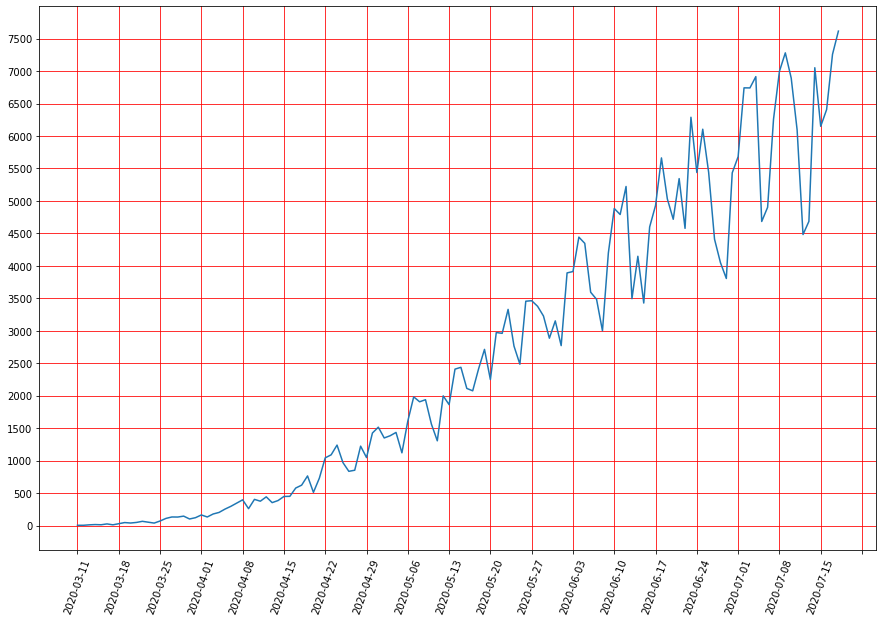

In [9]:
#Ahora Graficamos el incremento diario de enfermos
plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(7))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(500))
plt.xticks(rotation=70)
plt.grid(b=True, color='r')
plt.plot(dates[7:],pasto_enfermos[6:])


In [10]:
#Vamos recuperar los datos de la gráfica
#Primero creamos un dicionario con los datos
delta_enfermos={}
#Luego lo llenamos
print(f"Incremento diario en enfermos durante: {len(dates[7:])} dias\n") #cortamos los primeros siete dias por inconsistencias
for i in range (7,len(dates)):
    delta_enfermos[dates[i]]=pasto_enfermos[i-1]
#Ahora Imprimimos la delta de enfermos

#for key in delta_enfermos:
#    print(f"{key} : {delta_enfermos[key]}")
print(delta_enfermos)

Incremento diario en enfermos durante: 130 dias

{'2020-03-11': 4.0, '2020-03-12': 4.0, '2020-03-13': 11.0, '2020-03-14': 15.0, '2020-03-15': 12.0, '2020-03-16': 25.0, '2020-03-17': 11.0, '2020-03-18': 29.0, '2020-03-19': 46.0, '2020-03-20': 39.0, '2020-03-21': 48.0, '2020-03-22': 65.0, '2020-03-23': 51.0, '2020-03-24': 38.0, '2020-03-25': 70.0, '2020-03-26': 110.0, '2020-03-27': 132.0, '2020-03-28': 131.0, '2020-03-29': 145.0, '2020-03-30': 101.0, '2020-03-31': 121.0, '2020-04-01': 163.0, '2020-04-02': 132.0, '2020-04-03': 178.0, '2020-04-04': 202.0, '2020-04-05': 253.0, '2020-04-06': 296.0, '2020-04-07': 346.0, '2020-04-08': 396.0, '2020-04-09': 260.0, '2020-04-10': 403.0, '2020-04-11': 375.0, '2020-04-12': 442.0, '2020-04-13': 353.0, '2020-04-14': 385.0, '2020-04-15': 448.0, '2020-04-16': 450.0, '2020-04-17': 578.0, '2020-04-18': 622.0, '2020-04-19': 764.0, '2020-04-20': 511.0, '2020-04-21': 729.0, '2020-04-22': 1043.0, '2020-04-23': 1089.0, '2020-04-24': 1239.0, '2020-04-25': 970.0

##Incremento diario en muertos

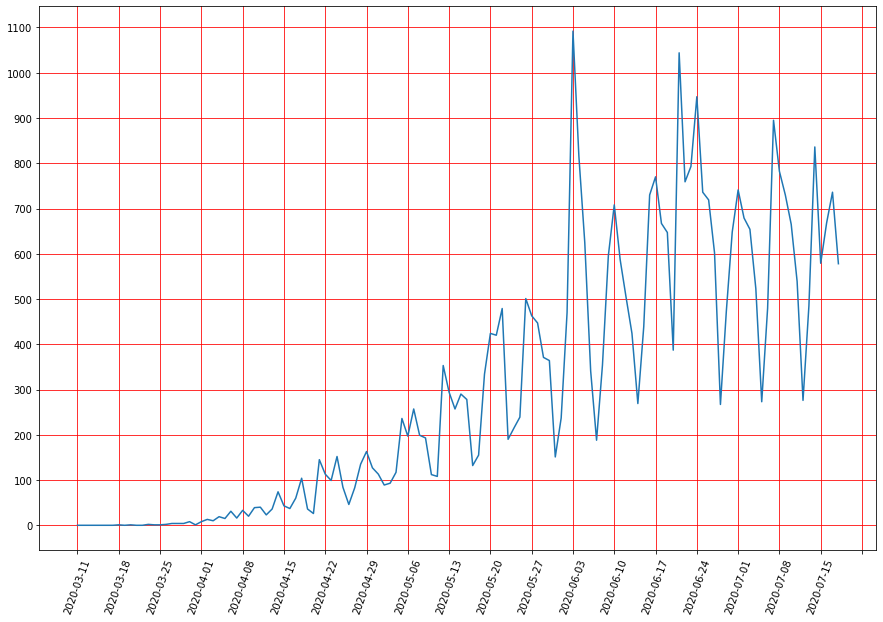

In [11]:
plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(7))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(100))
plt.xticks(rotation=70)
plt.grid(b=True, color='r')
plt.plot(dates[7:],pasto_muertos[6:])


In [12]:
#ahora imprimimos los datos del incremento de muertos
print(f"Incremento diario en muertos durante {len(dates[7:])} dias\n")
delta_muertos={} #diccionario para guardar el pasto de los muertos
for i in range (7,len(dates)):
    delta_muertos[dates[i]]=pasto_muertos[i-1]
    #print(f"{dates[i]} : {pasto_muertos[i-1]}" )
print(delta_muertos)    


Incremento diario en muertos durante 130 dias

{'2020-03-11': 0, '2020-03-12': 0, '2020-03-13': 0, '2020-03-14': 0, '2020-03-15': 0, '2020-03-16': 0, '2020-03-17': 0, '2020-03-18': 1.0, '2020-03-19': 0.0, '2020-03-20': 1.0, '2020-03-21': 0.0, '2020-03-22': 0.0, '2020-03-23': 2.0, '2020-03-24': 1.0, '2020-03-25': 1.0, '2020-03-26': 2.0, '2020-03-27': 4.0, '2020-03-28': 4.0, '2020-03-29': 4.0, '2020-03-30': 8.0, '2020-03-31': 1.0, '2020-04-01': 8.0, '2020-04-02': 13.0, '2020-04-03': 10.0, '2020-04-04': 19.0, '2020-04-05': 15.0, '2020-04-06': 31.0, '2020-04-07': 16.0, '2020-04-08': 33.0, '2020-04-09': 20.0, '2020-04-10': 39.0, '2020-04-11': 40.0, '2020-04-12': 23.0, '2020-04-13': 36.0, '2020-04-14': 74.0, '2020-04-15': 43.0, '2020-04-16': 37.0, '2020-04-17': 60.0, '2020-04-18': 104.0, '2020-04-19': 36.0, '2020-04-20': 26.0, '2020-04-21': 145.0, '2020-04-22': 113.0, '2020-04-23': 99.0, '2020-04-24': 152.0, '2020-04-25': 84.0, '2020-04-26': 46.0, '2020-04-27': 83.0, '2020-04-28': 135.0, '20

#Exportancion de la informacion a formato CSV para ser leida por excel y similares

In [13]:
#guardamos la informacion en formato CSV para ser leida por excel
excel_enfermos = pd.DataFrame.from_dict(d_enfermos, orient="index")
excel_muertos = pd.DataFrame.from_dict(d_muertos, orient="index")
excel_delta_enfermos = pd.DataFrame.from_dict(delta_enfermos, orient="index")
excel_delta_muertos = pd.DataFrame.from_dict(delta_muertos, orient="index")

#Auqui guardamos la informacion en formato CSV
excel_enfermos.to_csv("Total de enfermos.csv")
excel_muertos.to_csv("Total de muertos.csv")
excel_delta_enfermos.to_csv("Incremento en enfermos.csv")
excel_delta_muertos.to_csv("Incremento en muertos.csv")


#Analisis por dia de la semana

Ahora vamos a tratar de hacer analisis acumulativos por dia lunes, martes, etc,  sumando todos los enfermos del dia durante toda la pandemia y graficandolos por tipo de día.

In [14]:
#primero creamos una funcion que nos regrese al dia de la semana desde una string con fromato
#YYYY-MM-DD
import calendar
def day_of_week(fecha="2020-06-21"):
    """Esta funcion recibe un string de fecha en formato yyyy-mm-dd y debe regresar un entero
    con el dia de la semana, 0 para domingo, 1 para lunes, ..., 6 para sabado """
    year, month, day = (int(i) for i in fecha.split("-"))
    return calendar.weekday(year, month, day)
day_of_week()

#ya que tenemos el dia de la semana, creamos una funcion que regrese un diccionario 
#con los acumulados por dia de cada uno de los conjuntos de datos, la funcion
#debe recibir un conjunto de datos y regresar un diccionario con llaves por cada
#dia y el acumulado durante el periodo

def acumulados_por_dia(dict_datos):
    """ El diccionarion de datos debe tener el formato YYYY-MM-DD:dato, para varios dias"""
    #creamos los contenedores de datos, una lista para cada uno:
    lunes, martes, miercoles, jueves, viernes, sabado, domingo=[],[],[],[],[],[],[]
    #ahora recorremos el diccionario de datos
    for key in dict_datos:
        if day_of_week(key) == 0:
            domingo.append(dict_datos[key])
        if day_of_week(key) == 1:
            lunes.append(dict_datos[key])
        if day_of_week(key) == 2:
            martes.append(dict_datos[key])
        if day_of_week(key) == 3:
            miercoles.append(dict_datos[key])
        if day_of_week(key) == 4:
            jueves.append(dict_datos[key])
        if day_of_week(key) == 5:
            viernes.append(dict_datos[key])
        if day_of_week(key) == 6:
            sabado.append(dict_datos[key])
    #ahora creamos un diccionario para guardar los datos 
    salida={}
    salida["Lunes"]=sum(lunes)
    salida["Martes"]=sum(martes)
    salida["Miercoles"]=sum(miercoles)
    salida["Jueves"]=sum(jueves)
    salida["Viernes"]=sum(viernes)
    salida["Sabado"]=sum(sabado)
    salida["Domingo"]=sum(domingo)
    return salida
acc_enfermos=acumulados_por_dia(delta_enfermos)
acc_muertos=acumulados_por_dia(delta_muertos)
      

#grafica de enfermos acumulados por dia

{'Lunes': 49856.0, 'Martes': 50369.0, 'Miercoles': 55682.0, 'Jueves': 55552.0, 'Viernes': 50813.0, 'Sabado': 39641.0, 'Domingo': 36993.0}
Total de enfermos: 338906.0


<BarContainer object of 7 artists>

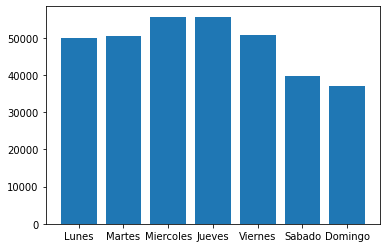

In [15]:
print(acc_enfermos)
print(f"Total de enfermos: {sum(acc_enfermos.values())}")
plt.bar(acc_enfermos.keys(), acc_enfermos.values())

#Grafica de Muerstos acumulados por dia

{'Lunes': 6764.0, 'Martes': 7359.0, 'Miercoles': 6562.0, 'Jueves': 6268.0, 'Viernes': 4759.0, 'Sabado': 3144.0, 'Domingo': 4032.0}
Total de muertos: 38888.0


<BarContainer object of 7 artists>

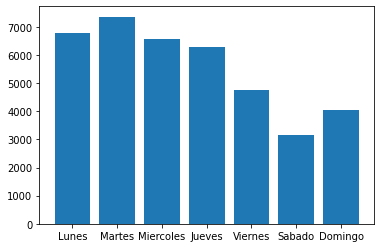

In [16]:
print(acc_muertos)
print(f"Total de muertos: {sum(acc_muertos.values())}")
plt.bar(acc_muertos.keys(),acc_muertos.values())